In [ ]:
import pandas as pd

def clean_dataframe(df, threshold_ratio=0.75, columns_to_drop=None, sort_by=None):
    threshold = len(df) * threshold_ratio
    mask = df.apply(lambda col: ((col == 0) | (col.isna()) | (col == '')).sum() <= threshold, axis=0)
    df = df.loc[:, mask]

    if columns_to_drop:
        columns_to_drop = [col for col in columns_to_drop if col in df.columns]
        df = df.drop(columns=columns_to_drop)
    if sort_by:
        sort_by = [col for col in sort_by if col in df.columns]
        if sort_by:
            df = df.sort_values(by=sort_by)
    return df

columns_to_remove = ['1. YEAR', '2. TRIFD', '3. FRS ID', '5. STREET ADDRESS', '6. CITY', '7. COUNTY', '8. ST', '9. ZIP', '14. HORIZONTAL DATUM', '15. PARENT CO NAME', '16. PARENT CO DB NUM', '17. STANDARD PARENT CO NAME', '21. FEDERAL FACILITY', '23. INDUSTRY SECTOR', '30. PRIMARY NAICS', '36. DOC_CTRL_NUM', '37. CHEMICAL', '38. ELEMENTAL METAL INCLUDED', '39. TRI CHEMICAL/COMPOUND ID', '40. CAS#', '41. SRS ID', '42. CLEAN AIR ACT CHEMICAL', '43. CLASSIFICATION', '44. METAL', '45. METAL CATEGORY', '46. CARCINOGEN', '47. PBT', '48. PFAS', '49. FORM TYPE', '50. UNIT OF MEASURE', '51. 5.1 - FUGITIVE AIR', '52. 5.2 - STACK AIR', '110. 8.1B - ON-SITE OTHER', '122. 8.9 - PRODUCTION RATIO', '121. PROD_RATIO_OR_ ACTIVITY']
columns_to_sort = ['12. LATITUDE', '13. LONGITUDE']

In [ ]:
import pandas as pd

years = range(2017, 2024)  # From 2017 to 2023
dataframes = []

for year in years:
    file_path = f'/content/{year}_us.csv'
    df = pd.read_csv(file_path)
    df = clean_dataframe(df, columns_to_drop=columns_to_remove, sort_by=columns_to_sort)

    grouped = df.groupby(['4. FACILITY NAME', '12. LATITUDE', '13. LONGITUDE', '22. INDUSTRY SECTOR CODE']).sum()

    # Relabel columns with year prefix and remove numbers
    rename_map = {
        '65. ON-SITE RELEASE TOTAL': f'{year}_ON-SITE RELEASE TOTAL',
        '88. OFF-SITE RELEASE TOTAL': f'{year}_OFF-SITE RELEASE TOTAL',
        '106. 6.2 - TOTAL TRANSFER': f'{year}_TOTAL TRANSFER',
        '107. TOTAL RELEASES': f'{year}_TOTAL RELEASES',
        '119. PRODUCTION WSTE (8.1-8.7)': f'{year}_PRODUCTION WASTE'
    }
    grouped = grouped.rename(columns=rename_map)

    dataframes.append(grouped)  # Store the processed DataFrame in a list

# Combine all years' data into one DataFrame with common keys
total_df = pd.concat(dataframes, axis=1).reset_index()

# Example: Access the final combined DataFrame
# print(total_df)


<ipython-input-5-69bfc40e3aeb>:8: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-5-69bfc40e3aeb>:8: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-5-69bfc40e3aeb>:8: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-5-69bfc40e3aeb>:8: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-5-69bfc40e3aeb>:8: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-5-69bfc40e3aeb>:8: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path

In [ ]:
total_df

,4. FACILITY NAME,12. LATITUDE,13. LONGITUDE,22. INDUSTRY SECTOR CODE,2017_ON-SITE RELEASE TOTAL,2017_OFF-SITE RELEASE TOTAL,2017_TOTAL TRANSFER,2017_TOTAL RELEASES,2017_PRODUCTION WASTE,2018_ON-SITE RELEASE TOTAL,...,2022_ON-SITE RELEASE TOTAL,2022_OFF-SITE RELEASE TOTAL,2022_TOTAL TRANSFER,2022_TOTAL RELEASES,2022_PRODUCTION WASTE,2023_ON-SITE RELEASE TOTAL,2023_OFF-SITE RELEASE TOTAL,2023_TOTAL TRANSFER,2023_TOTAL RELEASES,2023_PRODUCTION WASTE
0,1000PALMS VISTA CHINO PLANT,33.845320,-116.375570,327,0.000,0.0,0.0,0.000,0.000,0.000,...,0.100,0.00,0.0,0.100,1.000000e-01,0.100,0.000,0.000,0.100,1.000000e-01
1,14095 WILLOW PARK,32.728030,-97.620201,327,0.011,0.0,0.0,0.011,0.011,1.687,...,0.012,0.00,0.0,0.012,1.200000e-02,0.019,0.000,0.000,0.019,1.900000e-02
2,14096 - PROSPER,33.229268,-96.821519,327,0.090,0.0,0.0,0.090,0.090,20.294,...,0.039,0.00,0.0,0.039,3.900000e-02,0.068,0.000,0.000,0.068,6.800000e-02
3,14122 ABILENE 1,32.471710,-99.777520,327,0.044,0.0,0.0,0.044,0.044,2.492,...,0.017,0.00,0.0,0.017,1.700000e-02,0.022,0.000,0.000,0.022,2.200000e-02
4,1500 SOUTH TIBBS LLC,39.740281,-86.218331,325,36050.000,14073.7,169848.0,50123.700,5184439.000,65131.000,...,48937.000,27139.96,416614.0,76076.960,5.353191e+07,16624.000,19034.870,2006182.000,35658.870,2.388467e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28026,WOODWARD INC,40.586000,-105.061000,336,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,1.010,64489.720,1.010,6.448970e+04
28027,YANKEE CANDLE CO,42.443067,-72.617477,339,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.760,0.000,508.000,6.760,8.527600e+02
28028,YELLOWSTONE INDUSTRIAL LLC,41.167300,-80.706740,332,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,605.000,3620.000,3620.000,4225.000,4.225000e+03
28029,ZINKPOWER WACO,31.492900,-97.191000,332,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,267.209,11660.417,11660.417,11927.626,1.192763e+04


In [ ]:
total_df.to_csv('total_df.csv', index=False)

In [ ]:
# import matplotlib.pyplot as plt

# total_transfer_columns = [f'{year}_TOTAL TRANSFER' for year in years]
# total_transfer_sum = total_df[total_transfer_columns].sum()

# total_transfer_sum.plot(kind='line', marker='o', title='TOTAL TRANSFER Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Total Transfer')
# plt.xticks(ticks=range(len(years)), labels=years)
# plt.grid(True)
# plt.show()

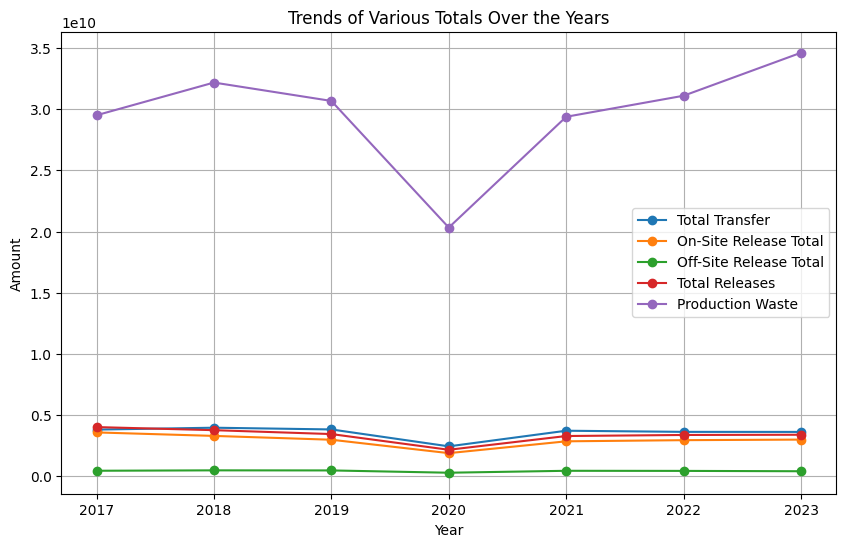

In [ ]:
columns_to_plot = {
    'TOTAL TRANSFER': 'Total Transfer',
    'ON-SITE RELEASE TOTAL': 'On-Site Release Total',
    'OFF-SITE RELEASE TOTAL': 'Off-Site Release Total',
    'TOTAL RELEASES': 'Total Releases',
    'PRODUCTION WASTE': 'Production Waste'
}

plt.figure(figsize=(10, 6))
for col, label in columns_to_plot.items():
    col_names = [f'{year}_{col}' for year in years]
    col_sum = total_df[col_names].sum()
    plt.plot(years, col_sum, marker='o', label=label)

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Trends of Various Totals Over the Years')
plt.xticks(ticks=years, labels=years)
plt.legend()
plt.grid(True)
plt.show()

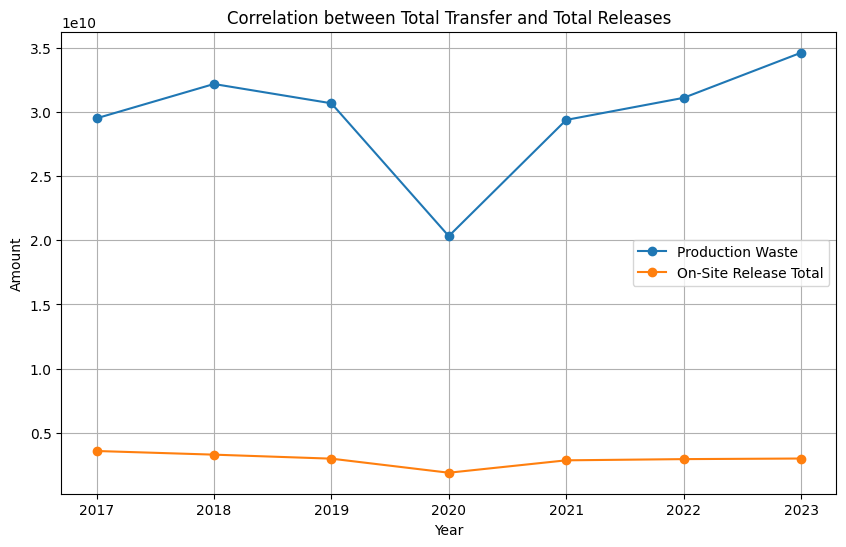

In [ ]:

total_transfer_cols = [col for col in total_df.columns if 'PRODUCTION WASTE' in col]
total_releases_cols = [col for col in total_df.columns if 'ON-SITE RELEASE TOTAL' in col]

total_transfer_sums = total_df[total_transfer_cols].sum()
total_releases_sums = total_df[total_releases_cols].sum()

years = [int(col.split('_')[0]) for col in total_transfer_cols]

plt.figure(figsize=(10, 6))
plt.plot(years, total_transfer_sums, label='Production Waste', marker='o')
plt.plot(years, total_releases_sums, label='On-Site Release Total', marker='o')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Correlation between Total Transfer and Total Releases')
plt.legend()
plt.grid(True)
plt.show()
